In [99]:
# -*- coding: utf-8 -*-
"""
Created on Sun august 21 14:35:15 2016
@author: Sidon
"""
%matplotlib inline
import pandas as pd
import numpy as np
from collections import OrderedDict
from tabulate import tabulate, tabulate_formats
import seaborn
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

# Load from CSV
data1 = pd.read_csv('~/dev/coursera/gapminder.csv', skip_blank_lines=True,
                     usecols=['country','incomeperperson',
                              'alcconsumption', 'lifeexpectancy'])
 
# Rename columns for clarity                                    
data1.columns = ['country','income','alcohol','life']

# Variables Descriptions
INCOME = "2010 Gross Domestic Product per capita in constant 2000 US$"
ALCOHOL = "2008 alcohol consumption per adult (liters, age 15+)"
LIFE = "2011 life expectancy at birth (years)"


# converting to numeric values and parsing (numeric invalids=NaN)
for dt in ('alcohol','income', 'life') :
   data1[dt] = pd.to_numeric(data1[dt], 'errors=coerce') 

# Remove rows with nan values
data1 = data1.dropna(axis=0, how='any')

# Copy dataframe for univariate categorical variables
data2 = data1.copy()

In [100]:
# means for categorical Variables
means = {}
means['alcohol'] = data1.alcohol.mean()
means['income'] =  data1.income.mean()

print ('Means')
print (tabulate([[m for m in means.values()]], tablefmt="pipe", 
                headers=[k for k in means.keys()]))

Means
|   alcohol |   income |
|----------:|---------:|
|   6.78409 |  7006.36 |


In [101]:
# Create categorical variable alcohol (Two levels based on mean)

min_a = data1.alcohol.min()
max_a = data1.alcohol.max()

data2['alcohol'] = pd.cut(data1.alcohol, [np.floor(min_a),means['alcohol'],np.ceil(max_a)], 
                       labels=['<=6.8', '>6.8'])

data2["alcohol"] = data2["alcohol"].astype('category')

In [102]:
# Create categorical variable income (Two levels based on mean)

min_i = data1.income.min()
max_i = data1.income.max()

data2['income'] = pd.cut(data1.income, [np.floor(min_i),means['income'],np.ceil(max_i)], 
                       labels=['<=7006', '>7006'])

data2["income"] = data2["income"].astype('category')

print (data2.dtypes)

country      object
income     category
alcohol    category
life        float64
dtype: object


In [108]:
data_income1 = data2[data2.income=='<=7006']
data_income2 = data2[data2.income=='>7006']

model1 = smf.ols(formula='life ~ C(alcohol)', data=data_income1)
results1 = model1.fit()
#print (results1.summary())

model2 = smf.ols(formula='life ~ C(alcohol)', data=data_income2)
results2 = model2.fit()
#print ('\n',results2.summary())

r1 = [results1.fvalue, results1.f_pvalue]
r2 = [results2.fvalue, results2.f_pvalue]

print ('ANOVA results for income less than the mean (US$ 7006)')
print (tabulate([r1], tablefmt='fancy_grid', headers=['F-Value', 'P-value']))

print ('\nANOVA results for income greater than the mean (US$ 7006)')
print (tabulate([r2], tablefmt='fancy_grid', headers=['F-Value', 'P-value']))

ANOVA results for income less than the mean (US$ 7006)
╒═══════════╤═══════════╕
│   F-Value │   P-value │
╞═══════════╪═══════════╡
│   3.37363 │ 0.0686231 │
╘═══════════╧═══════════╛

ANOVA results for income greater than the mean (US$ 7006)
╒═══════════╤═════════════╕
│   F-Value │     P-value │
╞═══════════╪═════════════╡
│   13.0789 │ 0.000794359 │
╘═══════════╧═════════════╛


In [104]:
### Means 

means1 = data2.groupby(['income']).mean()
#means = (data_income1.life.mean(),data_income2.life.mean()) 
print(means1)

            life
income          
<=7006 66.265835
>7006  78.390909


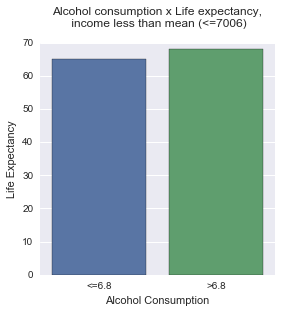

In [105]:
seaborn.factorplot(x='alcohol', y='life', data=data_income1, kind="bar", ci=None)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.title('Alcohol consumption x Life expectancy,\n income less than mean (<=7006)\n')
plt.show()

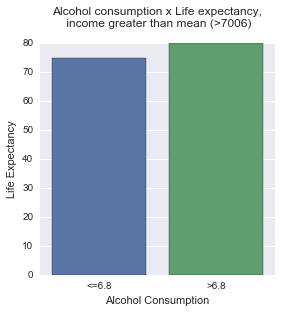

In [106]:
seaborn.factorplot(x='alcohol', y='life', data=data_income2, kind="bar", ci=None)
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.title('Alcohol consumption x Life expectancy,\n income greater than mean (>7006)\n')
plt.show()